# Project: Investigating firearm registrations and census data at a State level in the U.S.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this investigation the **FBI's National Instant Criminal Background Check System (NICS) data** and **U.S. census data** has been utilised.

#### FBI's National Instant Criminal Background Check System (NICS) data

The NICS data comes from the [FBI's National Instant Criminal Background Check System (NICS)](https://www.fbi.gov/about-us/cjis/nics). 

Mandated by the Brady Handgun Violence Prevention Act of 1993 and launched by the FBI on November 30, 1998, NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms or explosives. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 100 million such checks have been made in the last decade, leading to more than 700,000 denials.

Whilst the NICS data may at first glance look complete, it is important to remember it represents the number of firearm background checks initiated *but a one-to-one correlation cannot be made between a firearm background check and a firearm sale* due to varying state laws and purchase scenarios including:
- Checks may only be for concealed carry permits, not actual gun sales
- Kentucky runs a new check on each concealed carry license holder each month
- Checks not conducted for private gun sales e.g. Harvard researchers [found that roughly 40 percent](http://www.thetrace.org/2015/10/private-sale-loophole-background-check-harvard-research/) of respondents had acquired their most recent firearm without going through a background check.

The NICS data is provided in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.

#### U.S. census data

For this study, the NICS data has been supplemented with state level data from census.gov.

The U.S. census data is provided in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

#### Questions to investigate

- Which states have had the highest growth in firearm registrations?
- Is there a seasonality to firearm registrations?
- Does population change, education or poverty have an impact on firearm registrations?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First the relevant libraries will be loaded for this investigation:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

#### Properties of the NICS data

In [2]:
# read xlsx data into pandas as "nics"
nics = pd.read_excel("gun_data.xlsx")

# display first five rows of data in "nics"
nics.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
#display number of rows and columns
nics.shape

(12485, 27)

The dataset has many rows (12485) equating to the number of checks made in each state per month.

Each column represents the type of transaction submitted to the National Instant Criminal Background Check System (NICS). In addition, each type of transaction is broken down by the type of firearm—handgun, long gun, and other:

- Handgun — any firearm which has a short stock and is designed to be held and fired using a single hand;
- Long Gun — a weapon intended to be fired from the shoulder
- Other — refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers

There is generally not a relationship between permit checks/rechecks and type of firearm sold due to varying state laws as to when a permit check is required.

The columns named "multiple" denotes a background check where more than one type of firearm is associated to a
single background check and "admin" denotes the administrative checks that are for other authorized uses of the NICS.

The remaining columns break down the type of sale be it pawn, rental or private sales and by type of firearm per sale type.

In [4]:
#display data types, number of values and memory usage
nics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

There are a number of problems with this data as follows:

- Aside from "month", "state" and "totals", the majority of columns have missing data
- Data formats:
    - "Month" data is imported as an object. This will be converted to datetime format for analysis. 
    - "State" data is imported as an object. This is ok as it is composed of strings.
    - The rest of the data is numerical. Pandas has interpreted the majority of the numerical data to be in float format. This is incorrect as NICS checks are whole numbers (one cannot conduct half a check) and therefore all numerical data will be converted to integers. 

In [5]:
# display descriptive statistics
nics.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


On average, there are more long gun purchases than hand gun purchases. This is probably due to varying state laws pertaining to handgun permits. Since the permit check is done in place of the NICS check in most of the affected states, the low handgun statistics are often balanced out by a higher number of handgun permit checks

#### Properties of the U.S. Census data

In [6]:
# read xlsx data into pandas as "cens"
cens = pd.read_csv("U.S. Census Data.csv")

# display first five rows of data in "cens"
cens.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


The data needs to be transposed so that the rows are defined by state and the columns are defined by consistent values.

In [7]:
# transpose cens and make index Fact column
censt = cens.set_index('Fact').T

# result
censt.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# drop Fact Note row to keep data consistant
censt = censt.drop(censt.index[0])

# result
censt.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# display number of rows and columns
censt.shape

(50, 85)

In [10]:
# display data types, number of values and memory usage
censt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 85 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, percent, April 1, 2010                                            50 non-null object
Persons 65 years an

There is a lot of unnecessary data for this investigation and therefore a number of columns will be removed in the data cleaning process. 

Furthermore, the numerical data which is classified as an object will be re-labelled as numerical data to aid analysis. 

### Data Cleaning

#### Cleaning the NICS data

First the unnecessary data for this analysis will be removed, this includes the breakdown of type of sale:

In [11]:
nics = nics.loc[:, :'other']

# result
nics.head()

,month,state,permit,permit_recheck,handgun,long_gun,other
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0


In [12]:
nics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
month             12485 non-null object
state             12485 non-null object
permit            12461 non-null float64
permit_recheck    1100 non-null float64
handgun           12465 non-null float64
long_gun          12466 non-null float64
other             5500 non-null float64
dtypes: float64(5), object(2)
memory usage: 682.9+ KB


The null values in all columns with them can be filled with zeros as the lack of data can be equated to zero for this study purpose:

In [13]:
nics = nics.fillna(0)

# result
nics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
month             12485 non-null object
state             12485 non-null object
permit            12485 non-null float64
permit_recheck    12485 non-null float64
handgun           12485 non-null float64
long_gun          12485 non-null float64
other             12485 non-null float64
dtypes: float64(5), object(2)
memory usage: 682.9+ KB


The "month" column needs to be transformed to datatime format and has been broken down by month and year in separate columns:

In [14]:
nics['month'] =  pd.to_datetime(nics.month).dt.to_period('m')
nics['year'], nics['monthnum'] = nics['month'].dt.year, nics['month'].dt.month
# result
nics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 9 columns):
month             12485 non-null period[M]
state             12485 non-null object
permit            12485 non-null float64
permit_recheck    12485 non-null float64
handgun           12485 non-null float64
long_gun          12485 non-null float64
other             12485 non-null float64
year              12485 non-null int64
monthnum          12485 non-null int64
dtypes: float64(5), int64(2), object(1), period[M](1)
memory usage: 878.0+ KB


The numerical columns need to be transformed from float to int as all values are whole numbers, this will also decrease the memory usage:

In [15]:
cols = ['permit', 'permit_recheck', 'handgun', 'long_gun', 'other']
nics[cols] = nics[cols].astype(int)

# result
nics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 9 columns):
month             12485 non-null period[M]
state             12485 non-null object
permit            12485 non-null int32
permit_recheck    12485 non-null int32
handgun           12485 non-null int32
long_gun          12485 non-null int32
other             12485 non-null int32
year              12485 non-null int64
monthnum          12485 non-null int64
dtypes: int32(5), int64(2), object(1), period[M](1)
memory usage: 634.1+ KB


#### Cleaning the U.S. Census data

First the columns of interest for this analysis will be selected:

In [16]:
censt1 = censt[["Population estimates, July 1, 2016,  (V2016)",
        "Population estimates base, April 1, 2010,  (V2016)",
        "Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)",
        "Persons under 18 years, percent, July 1, 2016,  (V2016)",
        "Persons 65 years and over, percent,  July 1, 2016,  (V2016)",
        "Female persons, percent,  July 1, 2016,  (V2016)",
        "White alone, percent, July 1, 2016,  (V2016)",
        "Black or African American alone, percent, July 1, 2016,  (V2016)",
        "American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)",
        "Asian alone, percent, July 1, 2016,  (V2016)",
        "Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)",
        "Two or More Races, percent, July 1, 2016,  (V2016)",
        "Hispanic or Latino, percent, July 1, 2016,  (V2016)",
        "White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)",
        "Foreign born persons, percent, 2011-2015",
        "High school graduate or higher, percent of persons age 25 years+, 2011-2015",
        "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
        "Median household income (in 2015 dollars), 2011-2015",
        "Persons in poverty, percent"
       ]]

# result
censt1.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Foreign born persons, percent, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Persons in poverty, percent"
Alabama,"4,863,300","4,780,131",1.70%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,3.50%,84.30%,23.50%,"$43,623",17.10%
Alaska,"741,894","710,249",4.50%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,7.40%,92.10%,28.00%,"$72,515",9.90%
Arizona,"6,931,071","6,392,301",8.40%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,13.50%,86.00%,27.50%,"$50,255",16.40%
Arkansas,"2,988,248","2,916,025",2.50%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,4.70%,84.80%,21.10%,"$41,371",17.20%
California,"39,250,017","37,254,522",5.40%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,27.00%,81.80%,31.40%,"$61,818",14.30%


The column names are very long and need to be shortened for ease of use:

In [17]:
censt1.rename(columns={"Population estimates, July 1, 2016,  (V2016)":"pop est 2016",
                       "Population estimates base, April 1, 2010,  (V2016)":"pop est 2010",
                       "Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)":"pop change 2010-2016",
                       "Persons under 18 years, percent, July 1, 2016,  (V2016)":"under 18",
                       "Persons 65 years and over, percent,  July 1, 2016,  (V2016)":"over 65",
                       "Female persons, percent,  July 1, 2016,  (V2016)":"female",
                       "White alone, percent, July 1, 2016,  (V2016)":"white",
                       "Black or African American alone, percent, July 1, 2016,  (V2016)":"black",
                       "American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)":"am indian",
                       "Asian alone, percent, July 1, 2016,  (V2016)":"asian",
                       "Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)":"pac islander",
                       "Two or More Races, percent, July 1, 2016,  (V2016)":"two or more races",
                       "Hispanic or Latino, percent, July 1, 2016,  (V2016)":"hispanic",
                       "White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)":"white alone",
                       "Foreign born persons, percent, 2011-2015":"foreign",
                       "High school graduate or higher, percent of persons age 25 years+, 2011-2015":"high school grad or higher",
                       "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015":"bachelor or higher",
                       "Median household income (in 2015 dollars), 2011-2015":"median household income",
                       "Persons in poverty, percent":"persons in poverty"}, inplace=True)

# result
censt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 19 columns):
pop est 2016                  50 non-null object
pop est 2010                  50 non-null object
pop change 2010-2016          50 non-null object
under 18                      50 non-null object
over 65                       50 non-null object
female                        50 non-null object
white                         50 non-null object
black                         50 non-null object
am indian                     50 non-null object
asian                         50 non-null object
pac islander                  50 non-null object
two or more races             50 non-null object
hispanic                      50 non-null object
white alone                   50 non-null object
foreign                       50 non-null object
high school grad or higher    50 non-null object
bachelor or higher            50 non-null object
median household income       50 non-null object
persons i

C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


The population numbers are strings and need to be converted to integers:

In [18]:
columns = ['pop est 2016', 'pop est 2010']
for i in columns:
    censt1[i] = censt1[i].str.replace(',', '')
    censt1[i] = censt1[i].astype(str).astype(int)

# result
censt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 19 columns):
pop est 2016                  50 non-null int32
pop est 2010                  50 non-null int32
pop change 2010-2016          50 non-null object
under 18                      50 non-null object
over 65                       50 non-null object
female                        50 non-null object
white                         50 non-null object
black                         50 non-null object
am indian                     50 non-null object
asian                         50 non-null object
pac islander                  50 non-null object
two or more races             50 non-null object
hispanic                      50 non-null object
white alone                   50 non-null object
foreign                       50 non-null object
high school grad or higher    50 non-null object
bachelor or higher            50 non-null object
median household income       50 non-null object
persons in 

C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


The percentage columns have a mix of percent numbers and decimal numbers. These will need to be normalised to all be float numbers. An added complication is the Pacific Islander column has a mixture of letter Z (standing for zero) and numbers so the "Z" will be made nan first before converting to floats:

In [19]:
columns = ['pop change 2010-2016',
 'under 18',
 'over 65',
 'female',
 'white',
 'black',
 'am indian',
 'asian',
 'pac islander',
 'two or more races',
 'hispanic',
 'white alone',
 'foreign',
 'high school grad or higher',
 'bachelor or higher',
 'persons in poverty']

In [20]:
censt1['pac islander'] = censt1['pac islander'].replace('Z', np.nan)
for i in columns:
    mask = censt1[i].str.contains(r'%', na=True)
    censt1.loc[mask, [i]] = censt1[i].str.rstrip('%').astype(float) / 100.0
    censt1[i] = censt1[i].astype(float)
censt1['pac islander'] = censt1['pac islander'].fillna(0)

# result
censt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 19 columns):
pop est 2016                  50 non-null int32
pop est 2010                  50 non-null int32
pop change 2010-2016          50 non-null float64
under 18                      50 non-null float64
over 65                       50 non-null float64
female                        50 non-null float64
white                         50 non-null float64
black                         50 non-null float64
am indian                     50 non-null float64
asian                         50 non-null float64
pac islander                  50 non-null float64
two or more races             50 non-null float64
hispanic                      50 non-null float64
white alone                   50 non-null float64
foreign                       50 non-null float64
high school grad or higher    50 non-null float64
bachelor or higher            50 non-null float64
median household income       50 non-null obj

C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Finally, the median household income column is a mixture of strings and ints and will have to be converted all to ints and the symbols ($ and ,) removed:

In [21]:
censt1['median household income'] = censt1['median household income'].str.replace('$','').str.replace(',','')
censt1['median household income'] = censt1['median household income'].astype(int)

# result
censt1.head()

C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Fact,pop est 2016,pop est 2010,pop change 2010-2016,under 18,over 65,female,white,black,am indian,asian,pac islander,two or more races,hispanic,white alone,foreign,high school grad or higher,bachelor or higher,median household income,persons in poverty
Alabama,4863300,4780131,0.017,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,0.035,0.843,0.235,43623,0.171
Alaska,741894,710249,0.045,0.252,0.104,0.477,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,0.074,0.921,0.280,72515,0.099
Arizona,6931071,6392301,0.084,0.235,0.169,0.503,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,0.135,0.860,0.275,50255,0.164
Arkansas,2988248,2916025,0.025,0.236,0.163,0.509,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,0.047,0.848,0.211,41371,0.172
California,39250017,37254522,0.054,0.232,0.136,0.503,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,0.270,0.818,0.314,61818,0.143


<a id='eda'></a>
## Exploratory Data Analysis

### Which states have had the highest growth in firearm registrations?

First, the appropriate data needs to be selected and the sum of the three different firearm classifications calculated:

In [22]:
gunstate = nics[['state','handgun','long_gun','other','year']]
gunstate['sum'] = gunstate['handgun'] + gunstate['long_gun'] + gunstate['other']
gunstate.head()

C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,handgun,long_gun,other,year,sum
0,Alabama,5734,6320,221,2017,12275
1,Alaska,2320,2930,219,2017,5469
2,Arizona,11063,7946,920,2017,19929
3,Arkansas,4347,6063,165,2017,10575
4,California,37165,24581,2984,2017,64730


The data can be plot as a line plot showing the number of grouped firearm registration per year and per state:

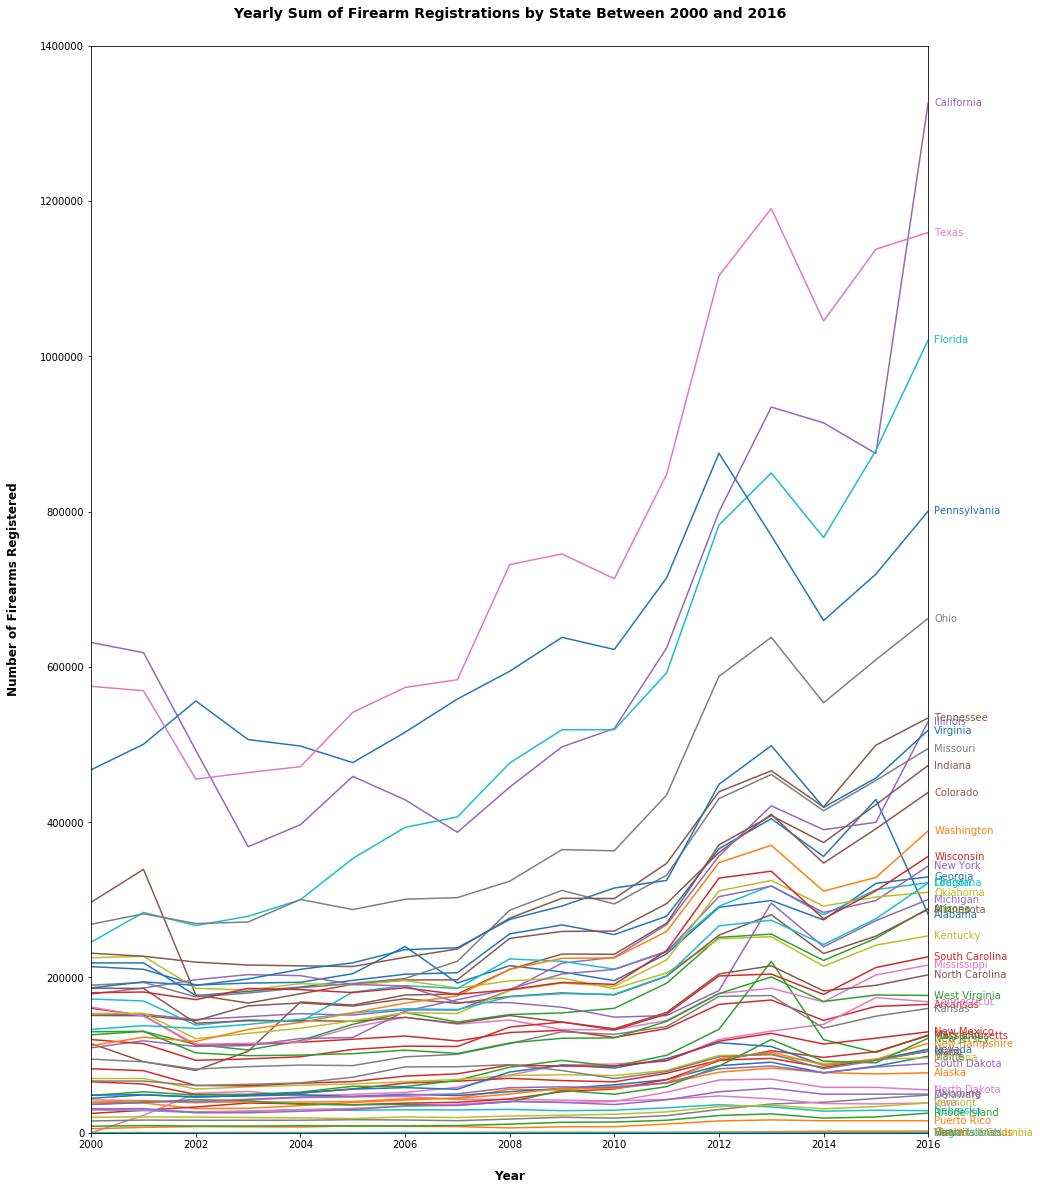

In [23]:
# plot size
fig, ax = plt.subplots(figsize=(15,20))

# use unstack
gunstate.groupby(['year','state']).sum()['sum'].unstack().plot(ax=ax)

# format chart
ax.set_xlim(2000,2016)
ax.set_ylim(0,1400000)
ax.set_xlabel("Year", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Number of Firearms Registered", labelpad=20, weight='bold', size=12)
ax.set_title("Yearly Sum of Firearm Registrations by State Between 2000 and 2016", 
             weight='bold', size=14, y=1.02)
ax.get_legend().remove()
for line, name in zip(ax.lines, gunstate.state):
    y = line.get_ydata()[-2]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=10, va="center")

Whilst the chart shows the states with the greatest number of firearm registrations, it is difficult to see which state has had the highest increase in firearm registrations. To illustrate this, the data needs to be modified slightly to demonstrate the change in firearm registrations through time and then displayed in a number of charts to better distinguish states:

In [24]:
# sum firearm purchases by state and month
gunstatech = nics[['month','state','handgun','long_gun','other']]
gunstatech['sum'] = gunstatech['handgun'] + gunstatech['long_gun'] + gunstatech['other']
gunstatech = gunstatech.drop(['handgun','long_gun','other'], axis=1)

C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# order dataframe by state and month
gunstatechs = gunstatech.sort_values(by=['state', 'month'])

In [26]:
# add cumulative sum calculation to total firearm registrations made per state per month
gunstatechs['cumsum'] = gunstatechs.groupby(by=['state'])['sum'].transform(lambda x: x.cumsum())

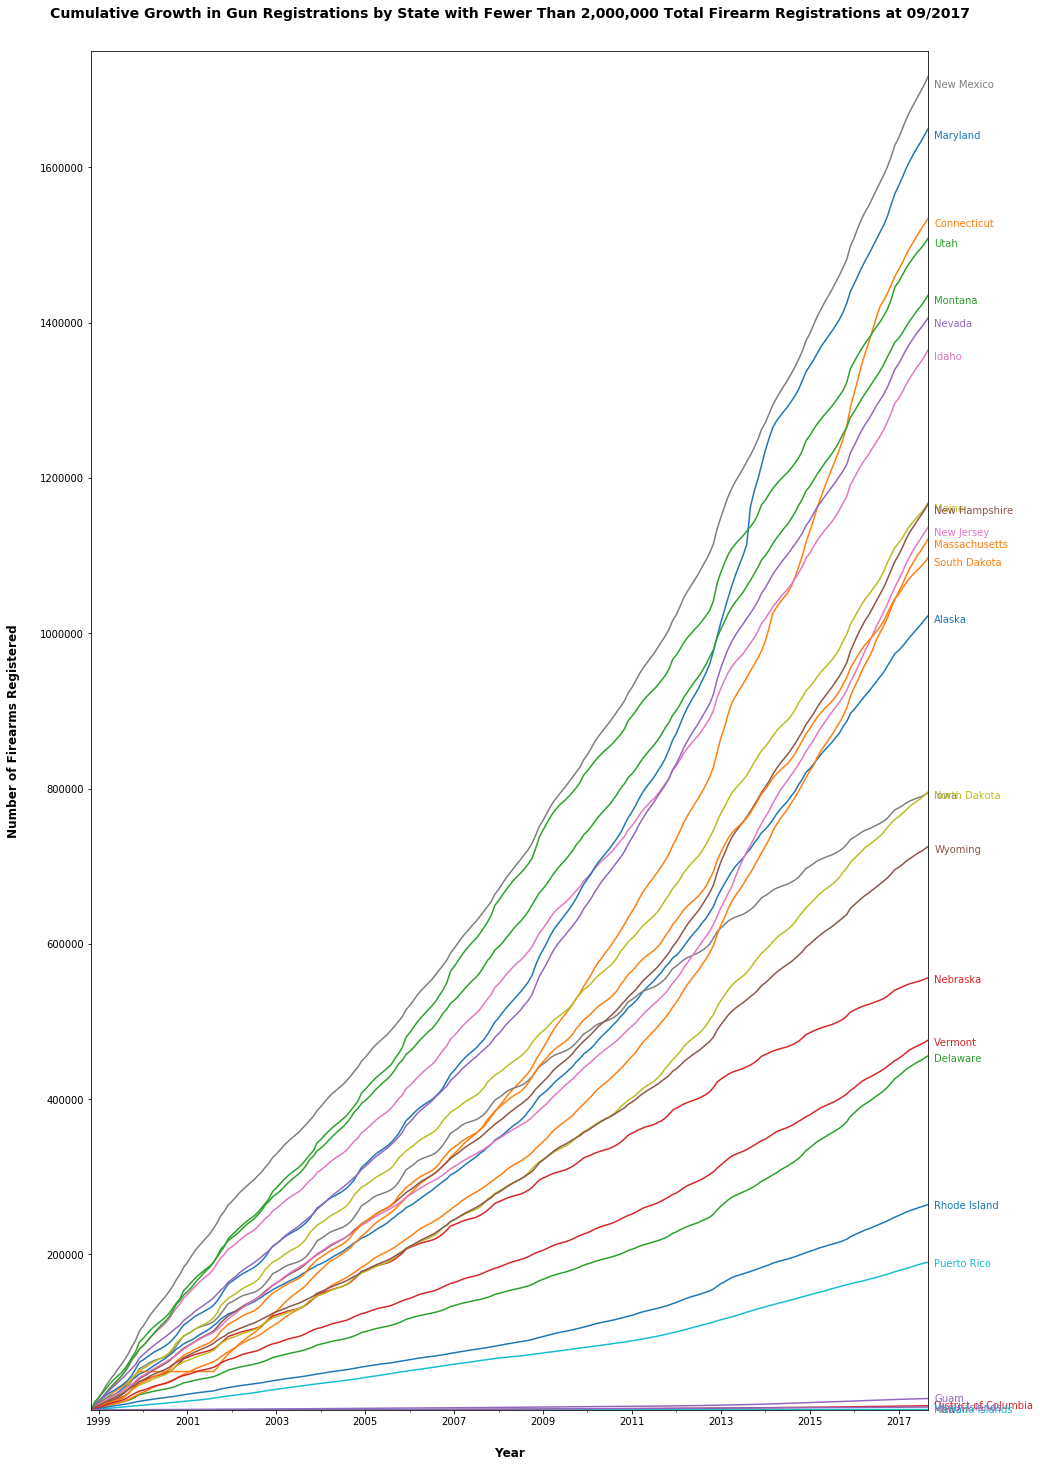

In [27]:
a = gunstatechs['state'].loc[(gunstatechs['month'] == '2017-09') & (gunstatechs['cumsum'] < 2000000)]
b = gunstatechs[gunstatechs['state'].isin(a)]
c = b.loc[(b['month'] == '2017-09')]

# plot size
fig, ax = plt.subplots(figsize=(15,25))

# use unstack
b.groupby(['month','state']).sum()['cumsum'].unstack().plot(ax=ax)

# format chart
ax.set_ylim(1,1750000)
ax.set_xlabel("Year", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Number of Firearms Registered", labelpad=20, weight='bold', size=12)
ax.set_title("Cumulative Growth in Gun Registrations by State with Fewer Than 2,000,000 Total Firearm Registrations at 09/2017", 
             weight='bold', size=14, y=1.02)
ax.get_legend().remove()
for line, name in zip(ax.lines, c.state):
    y = line.get_ydata()[-2]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=10, va="center")

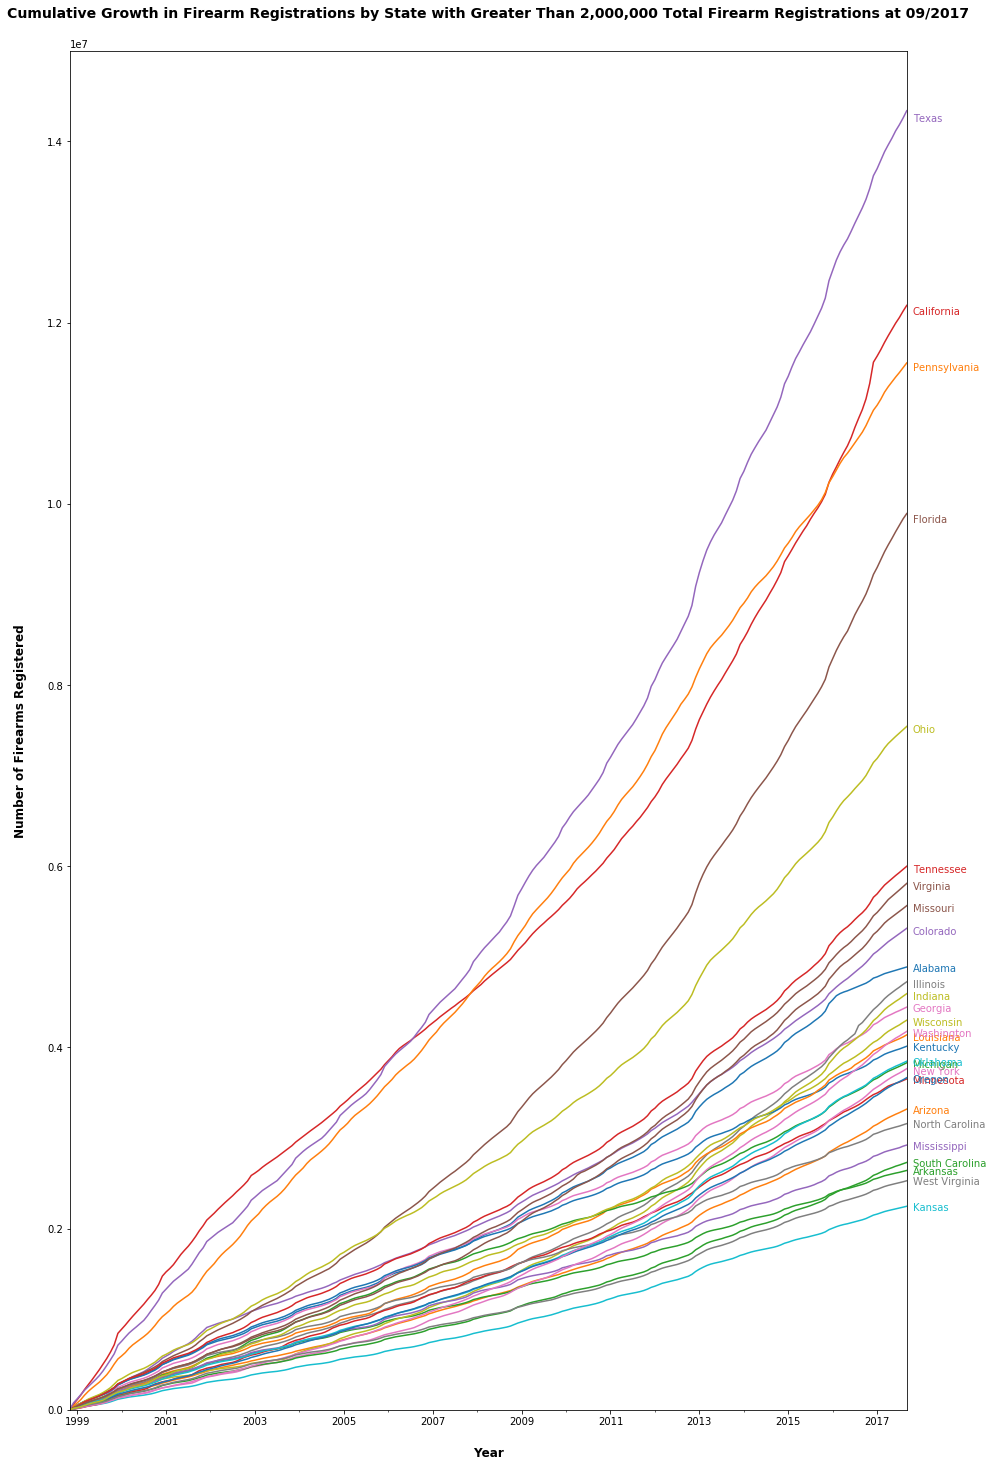

In [28]:
c = gunstatechs['state'].loc[(gunstatechs['month'] == '2017-09') & (gunstatechs['cumsum'] > 2000000)]
d = gunstatechs[gunstatechs['state'].isin(c)]
e = d.loc[(d['month'] == '2017-09')]

# plot size
fig, ax = plt.subplots(figsize=(15,25))

# use unstack
d.groupby(['month','state']).sum()['cumsum'].unstack().plot(ax=ax)

# format chart
ax.set_ylim(0,15000000)
ax.set_xlabel("Year", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Number of Firearms Registered", labelpad=20, weight='bold', size=12)
ax.set_title("Cumulative Growth in Firearm Registrations by State with Greater Than 2,000,000 Total Firearm Registrations at 09/2017", 
             weight='bold', size=14, y=1.02)
ax.get_legend().remove()
for line, name in zip(ax.lines, e.state):
    y = line.get_ydata()[-2]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=10, va="center")

The above line graph illustrates nicely that Texas has had the greatest growth in firearm registrations since the start of the dataset.

### Is there a seasonality to firearm registration?

As above, the appropriate data needs to be selected and the sum of the three different firearm classifications calculated, after which the data needs to be grouped by month:

In [29]:
gunmonth = nics[['monthnum','handgun','long_gun','other']]
gunmonth['sum'] = gunmonth['handgun'] + gunmonth['long_gun'] + gunmonth['other']
gunmonth = gunmonth.groupby('monthnum')['sum'].sum().reset_index()
gunmonth['month'] = pd.to_datetime(gunmonth['monthnum'], format='%m').dt.month_name()
gunmonth = gunmonth.drop(['monthnum'], axis=1)
gunmonth = gunmonth.set_index('month')
gunmonth

C:\Apps\Continuum\Anaconda3\envs\geocomp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sum
month,
January,13914627
February,15506988
March,15696618
April,12982977
May,11180478
June,10991306
July,11066209
August,13242233
September,14092653


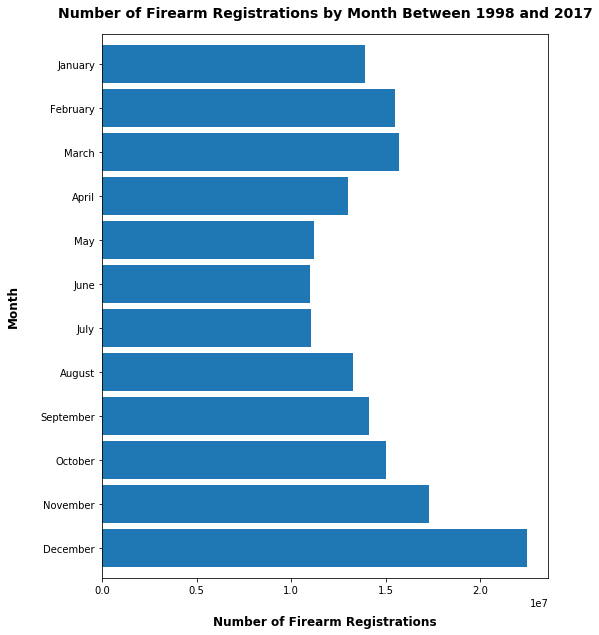

In [30]:
ax = gunmonth.plot(kind='barh', figsize=(8, 10), zorder=2, width=0.85)

# format chart
ax.set_xlabel("Number of Firearm Registrations", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Month", labelpad=20, weight='bold', size=12)
ax.set_title("Number of Firearm Registrations by Month Between 1998 and 2017", 
             weight='bold', size=14, y=1.02)
ax.get_legend().remove()
ax.invert_yaxis()

It is nicely illustrated in the bar chart above that there is a spike in firearm registrations in the December month. However, from data analysis, it is recognised that firearm registration data is incomplete pre-2009 with regards to registering or recording "other" types of firearms and therefore, to ensure the same pattern is observed in more recent and complete data, the same analysis will be conducted for the year 2016 only:

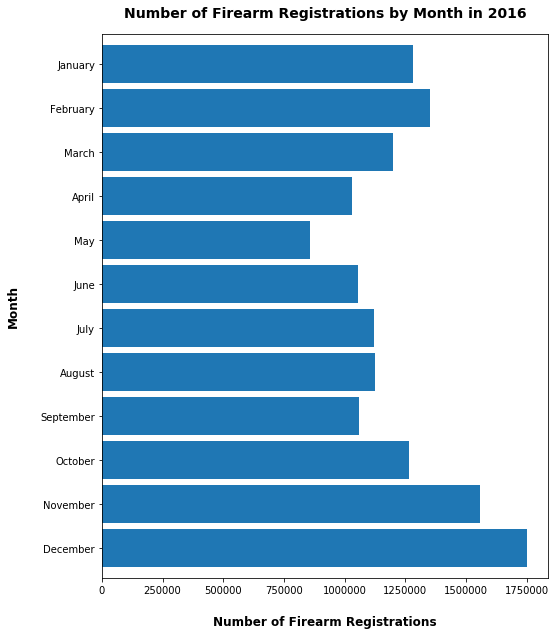

In [31]:
gunmonth16 = nics[['monthnum','year','handgun','long_gun','other']].loc[nics['year'] == 2016]
gunmonth16['sum'] = gunmonth16['handgun'] + gunmonth16['long_gun'] + gunmonth16['other']
gunmonth16 = gunmonth16.groupby('monthnum')['sum'].sum().reset_index()
gunmonth16['month'] = pd.to_datetime(gunmonth16['monthnum'], format='%m').dt.month_name()
gunmonth16 = gunmonth16.drop(['monthnum'], axis=1)
gunmonth16 = gunmonth16.set_index('month')

ax = gunmonth16.plot(kind='barh', figsize=(8, 10), zorder=2, width=0.85)

# format chart
ax.set_xlabel("Number of Firearm Registrations", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Month", labelpad=20, weight='bold', size=12)
ax.set_title("Number of Firearm Registrations by Month in 2016", 
             weight='bold', size=14, y=1.02)
ax.get_legend().remove()
ax.invert_yaxis()

A very similar pattern is observed in firearm registration by month between 2016 only and data from 1998 to 2017. It can therefore be considered reliable. 

### Does population change, education or poverty have an impact on firearm registrations?

The four census metrics can be extracted into a dataframe by state for this investigation:

In [32]:
censmet = censt1[['pop change 2010-2016','high school grad or higher','bachelor or higher','median household income','persons in poverty']]
censmet

Fact,pop change 2010-2016,high school grad or higher,bachelor or higher,median household income,persons in poverty
Alabama,0.017,0.843,0.235,43623,0.171
Alaska,0.045,0.921,0.280,72515,0.099
Arizona,0.084,0.860,0.275,50255,0.164
Arkansas,0.025,0.848,0.211,41371,0.172
California,0.054,0.818,0.314,61818,0.143
Colorado,0.102,0.907,0.381,60629,0.110
Connecticut,0.001,0.899,0.376,70331,0.098
Delaware,0.060,0.884,0.300,60509,0.117
Florida,0.096,0.869,0.273,47507,0.147
Georgia,0.064,0.854,0.288,49620,0.160


As the census statistics are from April 1, 2010 to July 1, 2016, the firearm registration totals in the NICS data needs to be trimmed to be inclusive of only those dates. The dataframe in the previous query will be utilised for this purpose as the cumulative sum of registrations had been created:

In [33]:
states = gunstatechs['state'].unique()
gunchange = pd.DataFrame(states, columns=['state'])
gunchange['2010-04_cum_gun_reg'] = gunstatechs['cumsum'].loc[(gunstatechs.month == '2010-04')].values
gunchange['2016-07_cum_gun_reg'] = gunstatechs['cumsum'].loc[(gunstatechs.month == '2016-07')].values
gunchange['pcnt_change'] = (gunchange['2016-07_cum_gun_reg'] / gunchange['2010-04_cum_gun_reg']) - 1
gunchange

,state,2010-04_cum_gun_reg,2016-07_cum_gun_reg,pcnt_change
0,Alabama,2477578,4659764,0.880774
1,Alaska,476740,937480,0.966439
2,Arizona,1561985,3002871,0.922471
3,Arkansas,1518104,2464526,0.623424
4,California,5750049,10843154,0.885750
5,Colorado,2613874,4830927,0.848187
6,Connecticut,576530,1406624,1.439811
7,Delaware,192451,404010,1.099288
8,District of Columbia,1225,4295,2.506122
9,Florida,3988798,8775809,1.200114


In [34]:
gunchange['pcnt_change'].mean()

0.9485784090135544

Firearm registrations have increased significantly in every state between 2010 and 2016 but do the census metrics in this query have a relationship?

Text(0.5, 1.02, 'Comparison of Change in Firearm Registrations Between 2010-2016 and U.S. Census Data by State')

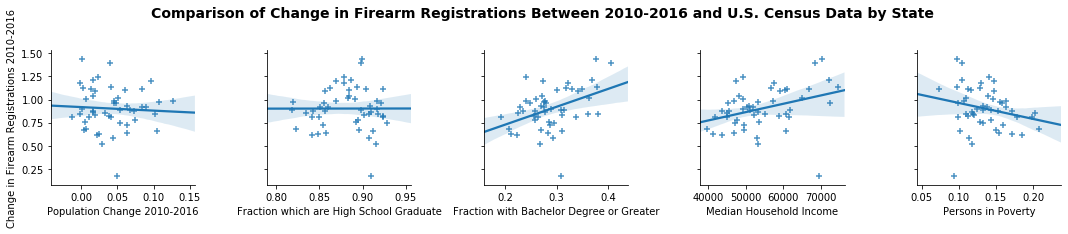

In [35]:
gunregcens = gunchange.merge(censmet, left_on='state', right_index=True, how='inner')
gunregcens = gunregcens.drop(['2010-04_cum_gun_reg','2016-07_cum_gun_reg'], axis=1)
gunregcens.rename(columns = {'pcnt_change':'Change in Firearm Registrations 2010-2016', 
                                          'pop change 2010-2016':'Population Change 2010-2016', 
                                          'high school grad or higher':'Fraction which are High School Graduate',
                                          'bachelor or higher':'Fraction with Bachelor Degree or Greater',
                             'median household income':'Median Household Income',
                             'persons in poverty':'Persons in Poverty'}, inplace = True)
g = sns.pairplot(data = gunregcens, y_vars=['Change in Firearm Registrations 2010-2016'], x_vars=['Population Change 2010-2016', 
                                                                'Fraction which are High School Graduate', 
                                                                'Fraction with Bachelor Degree or Greater', 
                                                                'Median Household Income', 
                                                                'Persons in Poverty'], kind="reg", markers="+", height=3)
g.fig.suptitle("Comparison of Change in Firearm Registrations Between 2010-2016 and U.S. Census Data by State", weight='bold', size=14, y=1.02)

There is no apparent correlation between percentage change in firearm registrations and population change or high school graduate qualification by state. However there are weak positive correlations between an increase in firearm registrations and having a higher degree or higher median household income. There is also a weak negative correlation between increase in firearm registrations and decrease in poverty in state. 

<a id='limitations'></a>
## Limitations of Data Analysis

Whilst the above analysis has enabled some interesting conclusion to be drawn which are discussed below, the anlysis has a number of limitations which are addressed here:

- Whilst the NICS data may at first glance look complete, it is important to remember it represents the number of firearm background checks initiated but a one-to-one correlation cannot be made between a firearm background check and a firearm sale due to varying state laws and purchase scenarios. It is therefore important to always be aware the likely number of guns actually owned will be much greater and variable between states which means the conclusions drawn below cannot be taken as fact for actual gun ownership. 

- The NICS data had null values within certain years and certain states for gun registrations. For purposes of analysis, this was assumed to be zero and the null values filled but the null values may simply had represented unrecorded data and therefore limit the strength of the conclusions made below. 

<a id='conclusions'></a>
## Conclusions of Data Analysis

A number of conclusions can be drawn from the analysis conducted on the NICS and U.S. Census data above including:

- Firearm registrations have increased significantly in every state between 2009 and 2017. 
 - This could reflect an increase in the use of NICS system or changes in federal policy regarding firearm registration and is not a reflection of firearm ownership for the reasons described at the top of this analysis. 

- The greatest increases in firearm registrations come from the states of Texas, California, Pennsylvania, Florida and Ohio. 
 - However, again, the data may be biased towards those states that enforce registration of all firearms. 

- Firearm registrations tend to peak in the month of December each year.
 - Whilst a further interpretation could be made to suggest the reason for the peak in December is due to Thanksgiving/Christmas gift-giving, this may be erroneous as there may be a legal reason behind most gun registrations occurring in December. For example, some states may require all new firearms to be registered by/at the end of each calendar year. Furthermore, the December peak is not dramatically different to certain other months. It would therefore be useful to go deeper into the analysis and analyse whether there is a State relationship to firearm registrations and month of year. 

- Firearm registrations tend to be greater in Autumn/Winter months compared to Spring/Summer months.
 - This is an interesting observation but the cause of it is unclear. Further analysis could look in whether this holds true for every state or perhaps it is only true for the states which have the greatest firearm registrations anyway and this trend is overwhelming other trends in states with fewer overall firearm registrations. Furthermore, data on hunting seasons in states may have a relationship with peaks and troughs in firearm registrations.

- Increased firearm registration may be greater in more affluent states.
 - Whilst perhaps to be expected, other statistics such as crime rates may have an influence on this relationship. For example, affluent states may have lower crime rates and therefore the population have less need or desire to obtain firearms.